In [54]:
from sklearn import datasets
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df ['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df.columns = [i.replace(" (cm)","").replace(" ","_") for i in  df.columns]

In [3]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df.target_name, test_size=0.4)

In [4]:
X_train, y_train = df_train.iloc[:,:4], df_train.target
X_test, y_test = df_test.iloc[:,:4], df_test.target

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, gridplot
from bokeh.models import ColumnDataSource, Legend
from bokeh.transform import factor_cmap, factor_mark
output_notebook()

Loading BokehJS ...

In [68]:
ds = ColumnDataSource(df_train)
mark_size = 10
p1 = figure(title=None, width=300, height=300)
p1.yaxis.axis_label = 'Sepal Width'
p1.scatter('sepal_length', 'sepal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p2 = figure(title=None, width=300, height=300)
p2.scatter('petal_length', 'sepal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p3 = figure(title=None, width=300, height=300)
p3.xaxis.axis_label = 'Sepal Length'
p3.yaxis.axis_label = 'Petal Width'
p3.scatter('sepal_length', 'petal_width', source=ds, legend='target_name', size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p3.legend.location = 'bottom_right'
p4 = figure(title=None, width=300, height=300)
p4.xaxis.axis_label = 'Petal Length'
p4.scatter('petal_length', 'petal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p = gridplot([[p1,p2], [p3,p4]])
show(p)

## Decision Tree

In [69]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


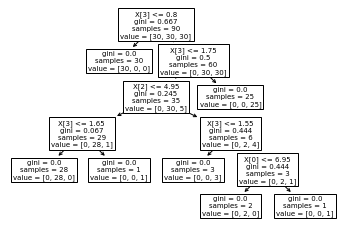

In [70]:
ax = tree.plot_tree(clf);
ax;

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
accuracy_score(y_test, y_hat)

0.9833333333333333

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_test, y_hat)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9833333333333333

## SVM

In [71]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1,gamma='auto')

# Somente 2 features para poder plotar boundaries.
clf = clf.fit(X_train[['sepal_length','sepal_width']], y_train)
y_hat = clf.predict(X_test[['sepal_length','sepal_width']].iloc[:,:2])
accuracy_score(y_test, y_hat)

0.8

Text(0.5, 1.0, 'SVC with linear kernel')

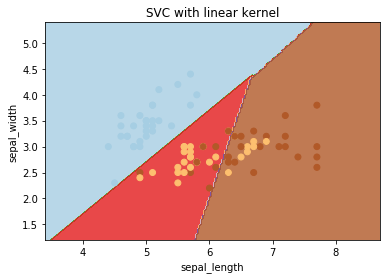

In [72]:
# create a mesh to plot in
feat1, feat2 = 'sepal_length', 'sepal_width'
x_min, x_max = X_train[feat1].min() - 1, X_train[feat1].max() + 1
y_min, y_max = X_train[feat2].min() - 1, X_train[feat2].max() + 1
h = (x_max / x_min)/100
xx, yy = pd.np.meshgrid(pd.np.arange(x_min, x_max, h),
 pd.np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = clf.predict(pd.np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_train[feat1], X_train[feat2], c=y_train, cmap=plt.cm.Paired)
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

## Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_hat, y_test)

0.9833333333333333

array([[0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0,
        1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0]])

## KNN

In [83]:
pd.np.empty()

array([[32.10625, 32.10625],
       [32.10625, 32.10625],
       [32.10625, 39.10625]])